### Bag Of Words Approach (CountVectorizer Implementation)

Bag of words model just simple convert the text into numberical vectors by just count the frequency of the words in the corpu.

Counter vectorizer model used bag of word approach 

In [190]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
bbc_df = pd.read_csv("bbc_text_cls.csv")
bbc_df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [192]:
bbc_df["labels"].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [193]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Fit and transform the data
bbc_df["labels"] =  encoder.fit_transform(bbc_df["labels"])
X = bbc_df["text"]
y = bbc_df["labels"]

In [194]:
encoder.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [195]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [196]:

bbc_df["labels"].unique()

array([0, 1, 2, 3, 4])

' '

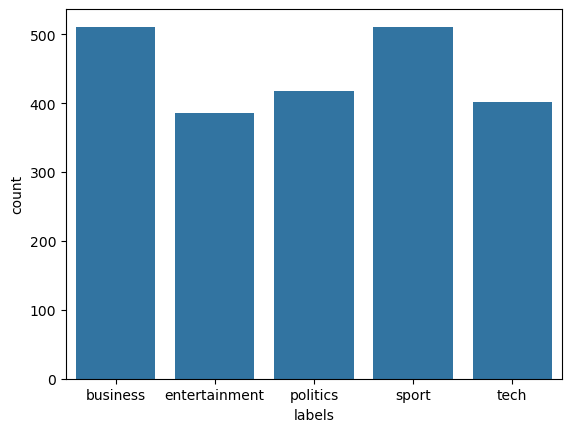

In [197]:
sns.countplot(bbc_df, x="labels")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=encoder.classes_)
' '

In [198]:

vectorizer = CountVectorizer()
X_train_ = vectorizer.fit_transform(X_train)
X_test_ = vectorizer.transform(X_test)
vectorizer.get_feature_names_out()

array(['00', '000', '0001', ..., 'zutons', 'zvonareva', 'zvyagintsev'],
      dtype=object)

In [199]:
X_train_.shape

(1780, 26762)

In [200]:
X_test_.shape

(445, 26762)

In [201]:
model = MultinomialNB()
model.fit(X_train_,y_train)
print(f"model accuracy score for training data: {model.score(X_train_,y_train)}")
print(f"model accuracy score for test data: {model.score(X_test_,y_test)}")

model accuracy score for training data: 0.9943820224719101
model accuracy score for test data: 0.9730337078651685


In [202]:
from nltk.corpus import wordnet
from nltk.tag import pos_tag

def get_pos(pos_name):
    """ pos: part of speech like noun(NN), verb()"""
    if (pos_name.startswith("J")):
        return wordnet.ADJ
    elif pos_name.startswith("V"):
        return wordnet.VERB
    elif pos_name.startswith("R"):
        return wordnet.ADV
    elif pos_name.startswith("N"):
        return wordnet.NOUN
    else:
        return wordnet.NOUN 

In [203]:
from nltk.corpus import stopwords

def custom_tokenizer(text):
    wnl = WordNetLemmatizer()
    token = pos_tag(word_tokenize(text))
    stop_words = set(stopwords.words('english'))
    # print(token)
    
    lemmatized_tokens = []
    for word, pos in token:
        # Lemmatize the word
        lemmatized_word = wnl.lemmatize(word, pos=get_pos(pos))
        # Check if lemmatized word is not in stop words and is alphabetic
        if lemmatized_word.lower() not in stop_words and lemmatized_word.isalpha():
            lemmatized_tokens.append(lemmatized_word)
       
    return lemmatized_tokens


    
    
 
vectorizer = CountVectorizer(tokenizer=custom_tokenizer,token_pattern=None,stop_words="english")
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
vectorizer.get_feature_names_out()



/home/jamxt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  warnings.warn(


array(['aa', 'aaa', 'aaas', ..., 'zutons', 'zvonareva', 'zvyagintsev'],
      dtype=object)

In [204]:
model = MultinomialNB()
model.fit(X_train,y_train)
print(f"model accuracy score for training data: {model.score(X_train,y_train)}")
print(f"model accuracy score for test data: {model.score(X_test,y_test)}")

model accuracy score for training data: 0.9955056179775281
model accuracy score for test data: 0.9707865168539326
